In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize']=20,6

In [8]:
#read data
df = pd.read_csv('tech.csv',parse_dates=['Order Date'])
df.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [9]:
### Lets do data processing
# noting the easrlist and last recorded dates
start = df['Order Date'].min()
end = df['Order Date'].max()
print('start =',start, '\nend = ',end)

start = 2014-01-06 00:00:00 
end =  2017-12-30 00:00:00


<AxesSubplot:xlabel='Order Date'>

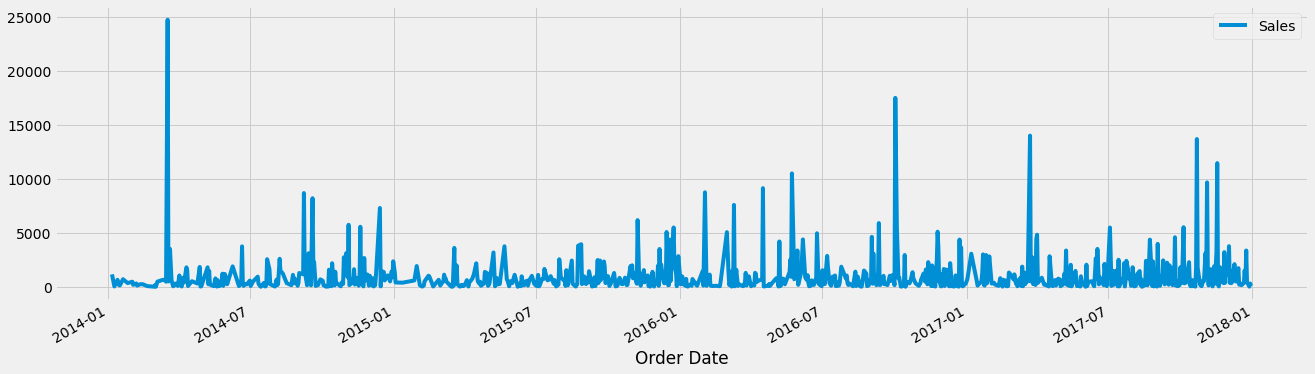

In [10]:
tech_df = df.sort_values('Order Date')
tech_df = tech_df.groupby('Order Date')['Sales'].sum().reset_index()
#setting order date as index
tech_df = tech_df.set_index('Order Date')
tech_df.plot()

<AxesSubplot:xlabel='Order Date'>

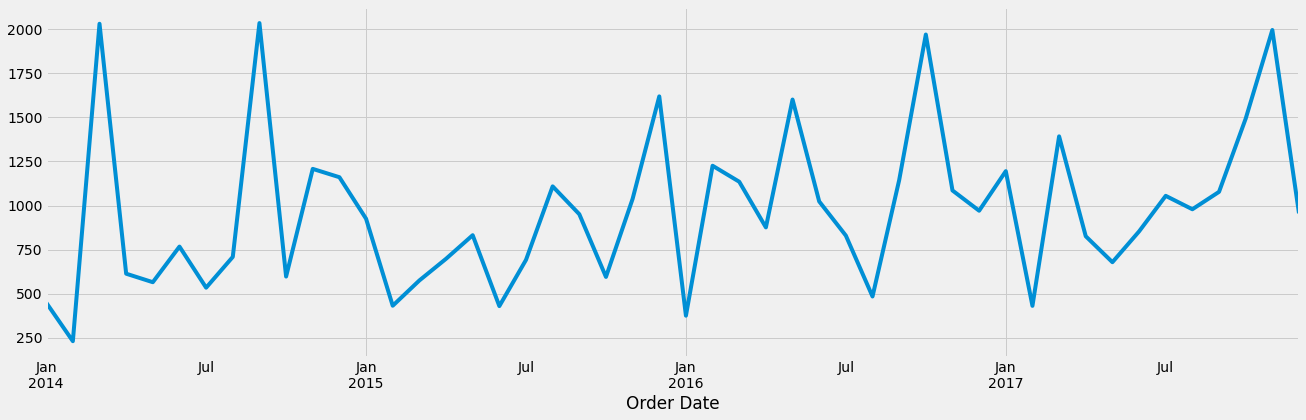

In [57]:
m_tech = tech_df['Sales'].resample('M').mean()
m_tech.plot()

In [59]:
#preform adf test
from statsmodels.tsa.stattools import adfuller
def test_stationariy(series):
    result = adfuller(series)
    print('adf statistics = ',result[0],'\np value =',result[1])

In [60]:
test_stationariy(m_tech)

adf statistics =  -7.187969198209016 
p value = 2.5473335960274205e-10


data Stationary

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
tech_decom = seasonal_decompose(m_tech,model='addictive')

Text(0.5, 1.0, 'tech decomposition')

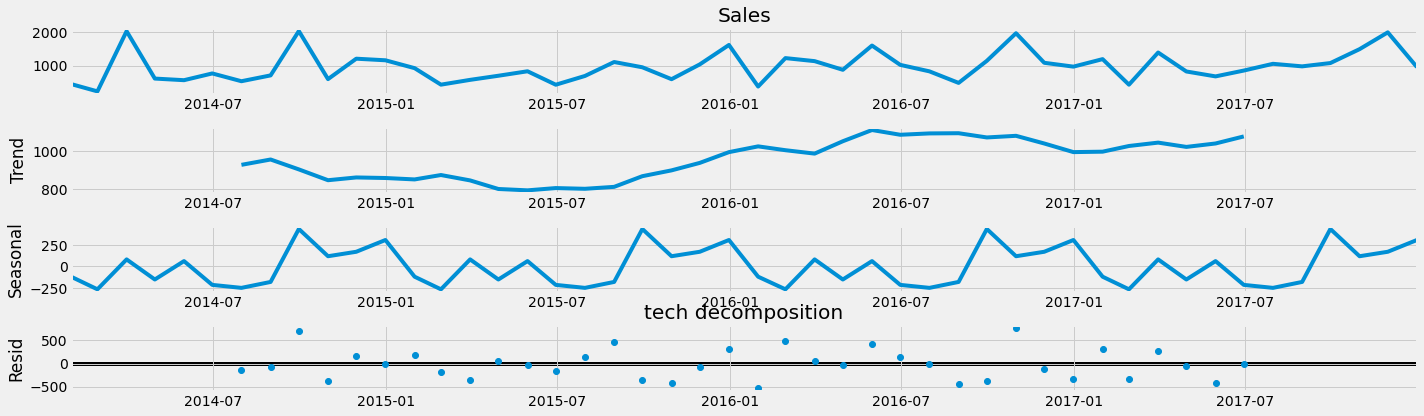

In [62]:
tech_decom.plot()
plt.title('tech decomposition')

Text(0.5, 1.0, 'Seasonality')

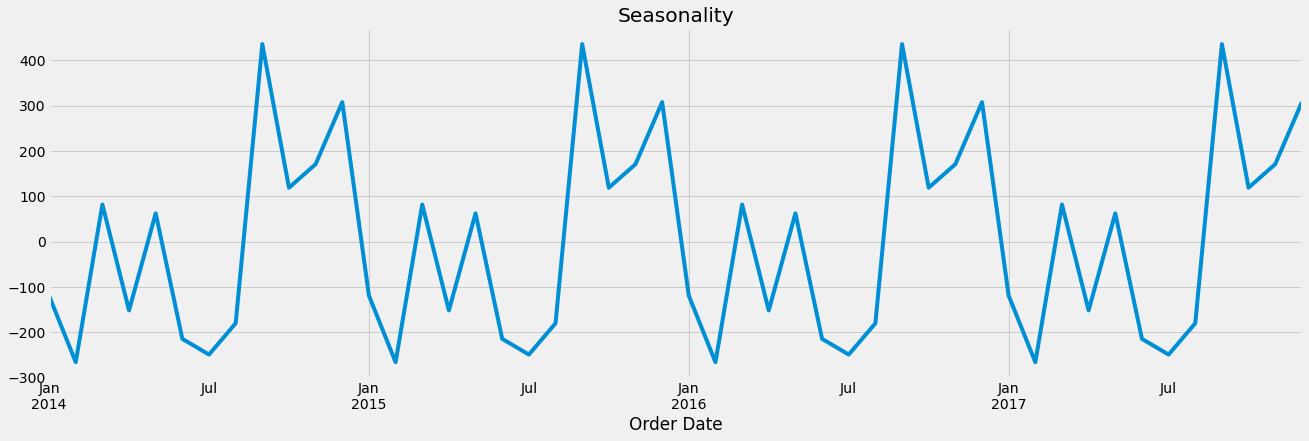

In [63]:
tech_decom.seasonal.plot()
plt.title('Seasonality')

Text(0.5, 1.0, 'Trend')

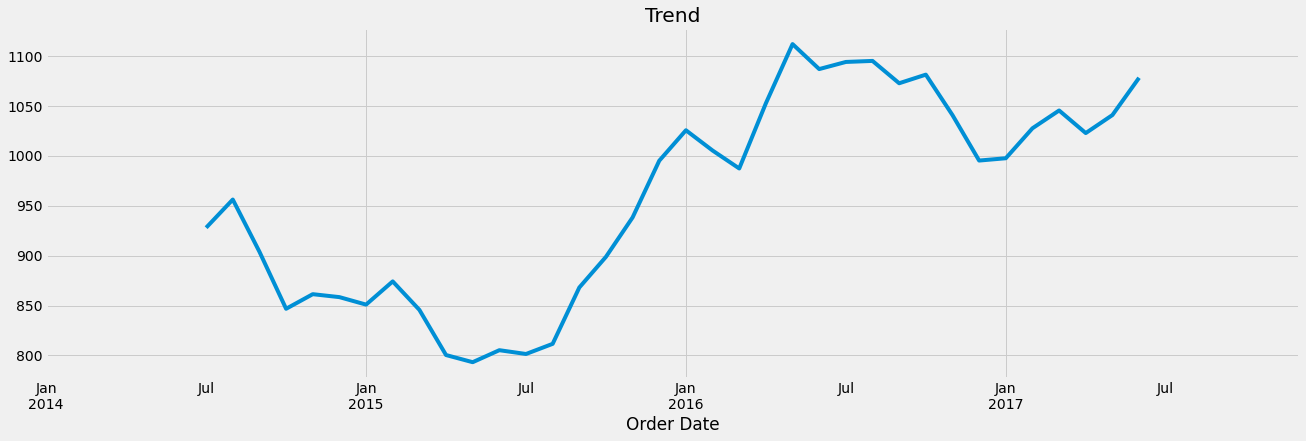

In [64]:
tech_decom.trend.plot()
plt.title('Trend')

Text(0.5, 1.0, 'Error')

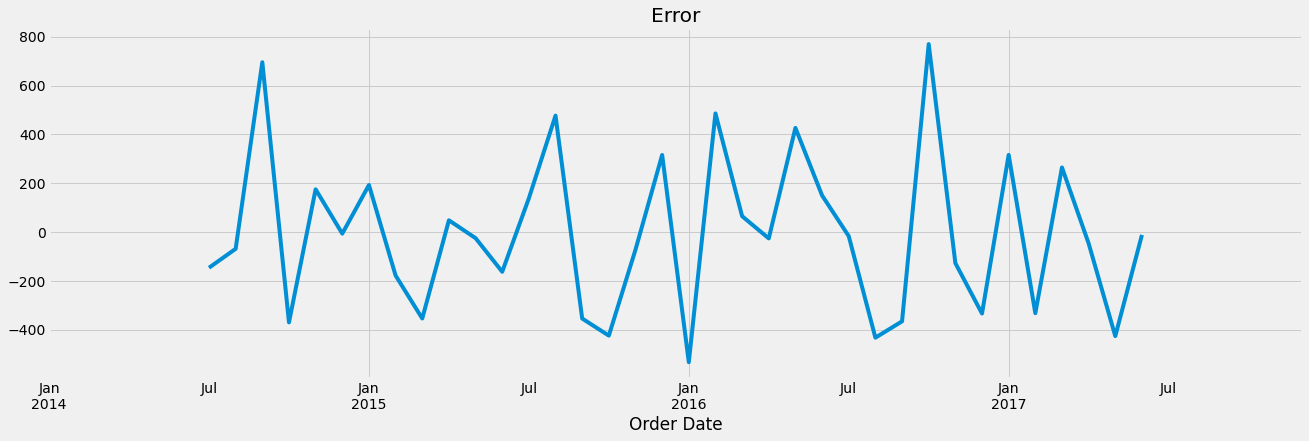

In [65]:
tech_decom.resid.plot()
plt.title('Error')

C:\Users\vasee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


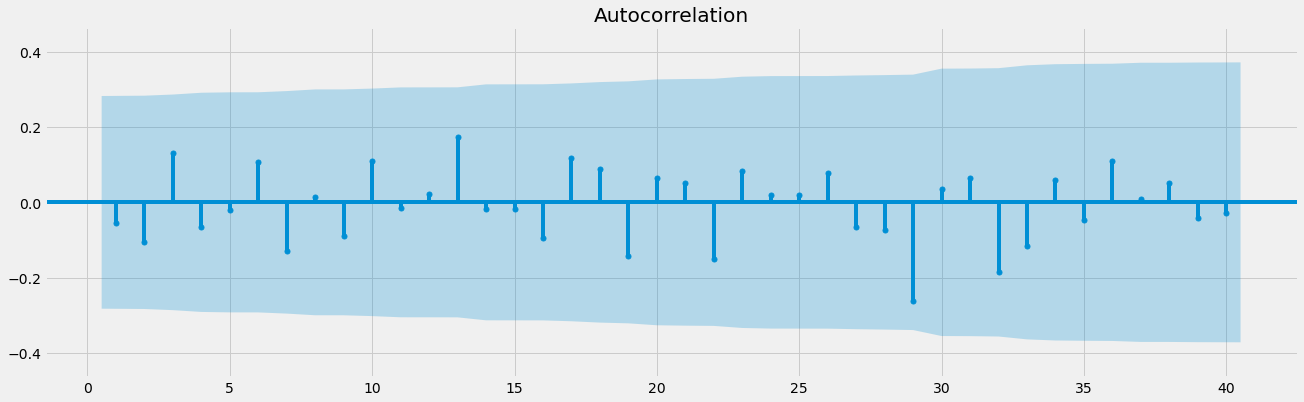

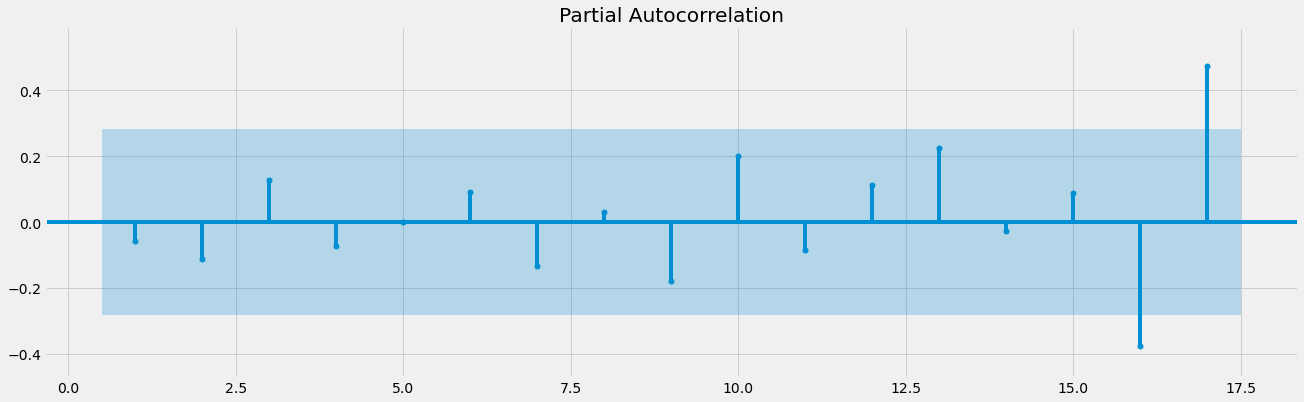

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(m_tech,zero = 0,auto_ylims=1,lags = 40);
plot_pacf(m_tech,zero = 0,auto_ylims=1);

presence of white noise. prediction not possible

# Time Series Analysis With SARIMA 

In [72]:
# splitting the data to train test
tech_train = m_tech[:36]
tech_test = m_tech[36:]

In [82]:
# applying auto arima to get the best order
from pmdarima import auto_arima
office_order = auto_arima(tech_train,m = 12,seasonal = True,trace=True,max_order = None,)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=556.421, Time=0.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=547.106, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=550.681, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=550.495, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=604.133, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=549.103, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=549.083, Time=0.04 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=551.082, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=548.705, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=548.514, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=550.570, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 1.264 seconds


In [83]:
office_order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:                        SARIMAX   Log Likelihood                -271.553
Date:                Wed, 30 Nov 2022   AIC                            547.106
Time:                        16:37:09   BIC                            550.273
Sample:                    01-31-2014   HQIC                           548.212
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    930.8998     96.872      9.610      0.000     741.035    1120.765
sigma2      2.086e+05   5.78e+04      3.609      0.000    9.54e+04    3.22e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.51   Prob(JB):                         0.06
Heteroskedasticity (H):               0.59   Skew:                             0.95
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""